先贴一个钢琴。

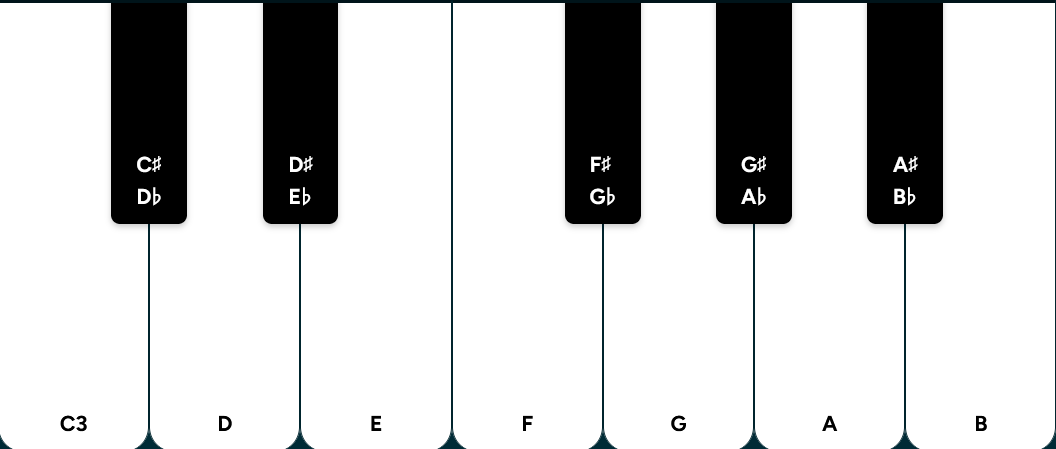

# 五线谱，以及如何找到纯八，纯四、纯五度

这里研究G谱号，因为最常用。五线谱有五线四间，下加一线是中央C，即C4。

五线的音高分别是EGBDF，Every Good Band Does Fine，注意它们之间都是三度，其中只有GB是大三度，其他的都是小三度。

四间的音高分别是FACE，注意到AC是小三度，其他的是大三度。

注意到，第n线上面是第n间。

注意到——线和相邻的间，以及间和相邻的线，它们的音程可能是大二度可能是小二度，大二度居多，所以我们把小二度当作特例，我们知道，EF，BC是小二度。因此能注意到，**-1间和0线（下加二间和下加一线，这里直接认为下加一间是0间，下加一线是0线以方便），第一线和第一间，第三线和第三间，第四间和第五线的音程是小二度**。

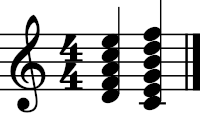

In [26]:
from music21 import *
from shutil import which

us = environment.UserSettings()
us['musicxmlPath'] = which('mscore')
us['musescoreDirectPNGPath'] = us['musicxmlPath']

s = stream.Stream() # type: ignore

s.append(chord.Chord(['D4', 'F4', 'A4', 'C5', 'E5']))
s.append(chord.Chord(['C4', 'E4', 'G4', 'B4', 'D5', 'F5']))
s.show()

虽然音程有参差，但有个东西是固定的——**从任何一根线开始，往上找到第四个间，会得到纯八度；从任何一个间开始，算上自己往上找到第四个线，会得到纯八度，往下亦然**。只有纯八度的这个特性是**无条件的**，这个规律和调号无关。

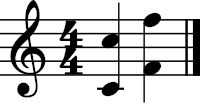

In [27]:
s = stream.Stream() # type: ignore
s.append(chord.Chord(['C4', 'C5']))
s.append(chord.Chord(['F4', 'F5']))
s.show()

然后是纯五度，观察五度圈——F、C、G、D、A、E、B、F#……，容易发现**只有B往上纯五度会引入修饰符，其他的音名往上纯五度仍旧是自然音名**。

观察能够发现，B和F之间同时隔了BC、EF，而其他的五度音程中只隔其中一个。

总而言之，有这样的特性：

以自然音阶去思考（即C大调），**除了B，对任意线上的音名，往上找到第二线得到纯五度，对任意间线上的音名，往上找到第二间得到纯五度，往下亦然**。B如此操作会得到减五度。

然而如果考虑到调号，问题会复杂一些，首先要明确，调号的作用是为了减少谱子中出现的修饰符，提高易读性，而纯五度在大调、小调中都是存在的。这时候我们发现F，C，G，D，A，E往上纯五度仍旧都是自然音名，所以**这些调号的五级音均不会增加修饰符**，这证明除了B，上面的规律均适用。

而对于B，我们知道它的纯五度是F#，因此B谱号会在F处增加修饰符，这时候实际上对于B，这个特性也是符合的，调号自动地把这个问题解决了。下面的代码观察CDEFGAB往上纯五度时的现象。

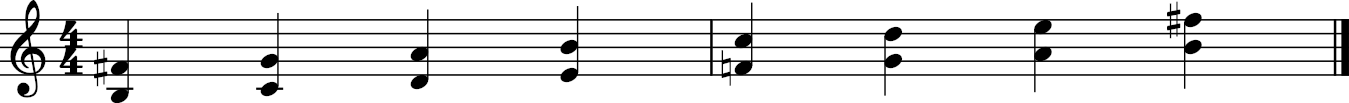

In [28]:
s = stream.Stream() # type: ignore
s.append(chord.Chord(['B3', 'F#4']))
s.append(chord.Chord(['C4', 'G4']))
s.append(chord.Chord(['D4', 'A4']))
s.append(chord.Chord(['E4', 'B4']))
s.append(chord.Chord(['F4', 'C5']))
s.append(chord.Chord(['G4', 'D5']))
s.append(chord.Chord(['A4', 'E5']))
s.append(chord.Chord(['B4', 'F#5']))
s.show()

纯四度也是类似的，我们知道四度圈是五度圈的反向，从B开始：B、E、A、D、G、C、F、Bb。容易发现。**只有F往上纯四度会引入修饰符，其它的音名往上纯四度仍旧是自然音名**。

观察能够发现，其它的四度音程之间都会间隔BC，EF中的一个，而FBb没有间隔。

总而言之，有这样的特性：

以自然音阶去思考（即C大调），**除了F，对任意线上的音名，往上找到第二间得到纯四度；对任意间上的音名，往上找到第二线得到纯四度**，F如此操作会得到增四度。

同纯五度——纯四度也是在大调、小调中均存在的，因此实际上这里处理了调号后对F同样适用。

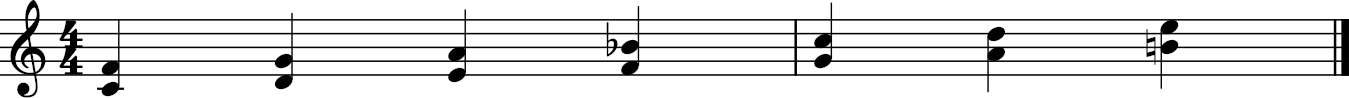

In [29]:
s = stream.Stream() # type: ignore
s.append(chord.Chord(['C4', 'F4']))
s.append(chord.Chord(['D4', 'G4']))
s.append(chord.Chord(['E4', 'A4']))
s.append(chord.Chord(['F4', 'Bb4']))
s.append(chord.Chord(['G4', 'C5']))
s.append(chord.Chord(['A4', 'D5']))
s.append(chord.Chord(['B4', 'E5']))
s.show()

上面学习了如何从五线谱中找到纯四度、纯五度、纯八度，能够发现，度数是奇数时，目标和原音高均会在线上或间上，偶数时则相反。下面画出每个音的一四五八音程找找感觉。注意纯五度往上纯四就是纯八。

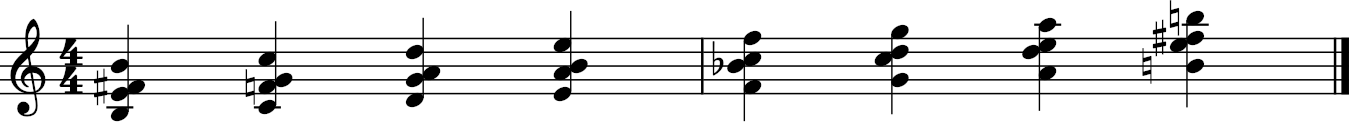

In [30]:
s = stream.Stream() # type: ignore
s.append(chord.Chord(['B3', 'E4', 'F#4', 'B4']))
s.append(chord.Chord(['C4', 'F4', 'G4', 'C5']))
s.append(chord.Chord(['D4', 'G4', 'A4', 'D5']))
s.append(chord.Chord(['E4', 'A4', 'B4', 'E5']))
s.append(chord.Chord(['F4', 'Bb4', 'C5', 'F5']))
s.append(chord.Chord(['G4', 'C5', 'D5', 'G5']))
s.append(chord.Chord(['A4', 'D5', 'E5', 'A5']))
s.append(chord.Chord(['B4', 'E5', 'F#5', 'B5']))
s.show()

# 五度圈的建立

再观察五度圈的规律：

1. 以C开始，检查C+**纯四**等于F，因此F加纯五等于C，这里已经得到F，C
2. C+**纯五** 等于G
3. **纯五加纯五是大九（大二）**，C+大二 等于D
4. 大二+纯五为**大六**，C+大六 等于A
5. 大六+纯五 等于 纯八-小三+纯五 等于**大三**，C+大三 等于E
6. 大三+纯五等于**大七**，C+大七 等于B

容易发现，顺时针走，定C为索引0，则C大调音阶的各级音分别为：

|C|D|E|F|G|A|B|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|2|4|-1|1|3|5|

注意到，**五度圈中，顺时针走就是增加纯五，逆时针走就是增加纯四**，也注意到，在大调音阶里这几个音都是**相邻的**。

这里显然有一些有趣的规律，实际上：

1. 纯五+纯五=大二（顺时针走两步）
2. 纯五+纯五+纯四=大二+纯四=纯五（顺时针走两步，逆时针走一步，注意到逆时针就是顺时针的反向（废话））
3. 纯五x4=大三
4. 纯五x3=大二加纯五=大六
5. 纯五x5=大三+纯五=大二+大六=大七
6. 纯五x6=大二x3=大三+大二=增四

同时注意到，**纯五xn和纯四xn是转位音程**，证明：

$$\begin{align}
n P4 &= n (P8 - P5) \\
n P4 &= n P8 - n P5 \\
n P4 + n P5 &= n P8
\end{align}
$$

根据这一特性，我们能知道：

1. 纯四+纯四=小七
2. 纯四x4=小六
3. 纯四x3=小三
4. 纯四x6=纯八-增四=增四=纯五x6
5. ...

如何快速推导五度圈呢？只需要记住顺时针走两次是大二（逆时针走两次则是向下大二），顺时针走一次是纯五，逆时针走一次是纯四即可，然后通过C-G便可以推出所有：

1. 知道C，G；C的向下纯五是G的向下大二即F，已知F，C，G
2. C往上大二得到D，G往上大二得到A，得到F，C，G，D，A……后面亦然
3. 最后得到F，C，G，D，A，E，B，F#，C#，G#，D#，A#，E#（即F，为何四度圈和五度圈会不一样，这里便是原因——如何解释这里的A#的纯五度）

注意到，对任何音，设它的索引是n，它的大调音阶的范围是n-1到n+5，前闭后闭，这是一个**窗口**，如C就是`[F, B]`，G就是`[C, F#]`……

注意到，以C，G，D，A，E，B为顺序，**音阶里的升号会越来越多**，这反映到了调号中。


五度圈的上行、下行算法是不一样的，上行中增加的修饰符都是#，下行中修饰符都是b：

上行：C -> G -> D -> A -> E -> B -> F# -> C# -> G# -> D# -> A# -> F -> C （注意A# -> F，这里是个六度关系，这么改是为了让它能够连起来）

下行（四度圈）：C -> F -> Bb -> Eb -> Ab -> Db -> Gb -> B -> E -> A -> D -> G -> C （注意Gb -> B，是个三度关系，这也是为了连起来）

<!-- 
# 五度圈的画法和记忆

五度圈中一共有12个音，正好和时钟上的小时数一致，我们可以以时钟为锚点（很容易在脑子里想像出时钟，知道三点钟、六点钟、九点钟方向在哪里）。

把12点称为0点，把C安排到0点方向，因此此时G就在1点方向，F就在11点方向，以此类推。这是“绝对”的五度圈。

0，3，6，9可以把五度圈分为四个部分——0-2，3-5，6-8，9-11，可以藉此观察到它们相对于C的音程，这个音程关系是总是维持的，无论五度圈怎么旋转，这个关系仍旧成立，这是“相对”的五度圈。

相对和绝对都需要记忆，并能够以任何音名为 0 点去处理它。 -->